In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import requests
import re

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

## reading df 

In [2]:
df = pd.read_csv("newdf.csv")

In [3]:
df.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team,contract
0,J. Todibo,22,79,84,245388,190,88,Right,81,CB,5,24500000,37000,48400000,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,Nice,2021 ~ 2027
1,B. Verbruggen,19,73,83,258498,194,89,Right,73,GK,10,5500000,6000,9400000,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,Anderlecht,2020 ~ 2025
2,M. Ugarte,21,79,85,253306,182,77,Right,80,CDM,6,26000000,11000,57200000,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,Sporting CP,2021 ~ 2026
3,Z. Debast,18,70,84,254262,189,76,Right,72,CDM,14,3500000,3000,7400000,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,Anderlecht,2019 ~ 2025
4,07 D. Last,37,61,60,21555,182,82,Right,61,GK,-1,0,0,0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,Örgryte,2009


In [4]:
df = df.loc[:,['name', 'Age', 'Overall rating', 'Potential', 'ID', 'Height', 'Weight',
       'foot', 'Best overall', 'Best position', 'Growth', 'Value', 'Wage',
       'Release clause', 'Total attacking', 'Crossing', 'Finishing',
       'Heading accuracy', 'Short passing', 'Volleys', 'Total skill',
       'Dribbling', 'Curve', 'FK Accuracy', 'Long passing', 'Ball control',
       'Total movement', 'Acceleration', 'Sprint speed', 'Agility',
       'Reactions', 'Balance', 'Total power', 'Shot power', 'Jumping',
       'Stamina', 'Strength', 'Long shots', 'Total mentality', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Total defending', 'Marking', 'Standing tackle', 'Sliding tackle',
       'Total goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Total stats', 'Base stats',
       'International reputation', 'Pace / Diving', 'Shooting / Handling',
       'Passing / Kicking', 'Dribbling / Reflexes', 'Defending / Pace', 'team',
       'contract']]

In [5]:
df.drop('contract', axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 64 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      2702 non-null   object
 1   Age                       2702 non-null   int64 
 2   Overall rating            2702 non-null   int64 
 3   Potential                 2702 non-null   int64 
 4   ID                        2702 non-null   int64 
 5   Height                    2702 non-null   int64 
 6   Weight                    2702 non-null   int64 
 7   foot                      2702 non-null   object
 8   Best overall              2702 non-null   int64 
 9   Best position             2702 non-null   object
 10  Growth                    2702 non-null   int64 
 11  Value                     2702 non-null   int64 
 12  Wage                      2702 non-null   int64 
 13  Release clause            2702 non-null   int64 
 14  Total attacking         

In [7]:
#Top 5 Valuable Player
df.nlargest(5,columns="Value")[["name","Age","Value","team"]]

,name,Age,Value,team
61,K. Mbappé,23,190500000,Paris Saint Germain
30,E. Haaland,21,176500000,Manchester City
152,F. de Jong,25,116500000,FC Barcelona
12,Vinícius Jr.,21,109000000,Real Madrid
120,K. De Bruyne,31,107500000,Manchester City


In [8]:
#Top 5 Rating Player
df.nlargest(5,columns="Overall rating")[["name","Age","team","Overall rating"]]

,name,Age,team,Overall rating
61,K. Mbappé,23,Paris Saint Germain,91
78,L. Messi,35,Paris Saint Germain,91
109,K. Benzema,34,Real Madrid,91
120,K. De Bruyne,31,Manchester City,91
30,E. Haaland,21,Manchester City,90


In [9]:
#Top 5 Clup (Mean Value)

pd.DataFrame(df.groupby("team").Value.mean().sort_values(ascending=False).head(5))

,Value
team,
Manchester City,4.424340e+07
Paris Saint Germain,4.408636e+07
FC Bayern München,3.929062e+07
Real Madrid,3.394828e+07
Atlético Madrid,3.267344e+07


## na values 

In [10]:
df.eq(0).sum()

name                          0
Age                           0
Overall rating                0
Potential                     0
ID                            0
Height                        0
Weight                        0
foot                          0
Best overall                  0
Best position                 0
Growth                      564
Value                        46
Wage                         44
Release clause              447
Total attacking               0
Crossing                      0
Finishing                     0
Heading accuracy              0
Short passing                 0
Volleys                       6
Total skill                   0
Dribbling                     0
Curve                         6
FK Accuracy                   0
Long passing                  0
Ball control                  0
Total movement                0
Acceleration                  0
Sprint speed                  0
Agility                       6
Reactions                     0
Balance 

## filling in missing data

In [11]:
df = df.interpolate()

## converting objects values to categorical values for team

In [12]:
for col in ['team']:
    df[col] = df[col].astype('category')

In [13]:
df.team.value_counts()

Chelsea              33
Manchester United    32
FC Barcelona         30
Liverpool            29
Real Madrid          29
                     ..
FC Andorra            1
Rosenborg             1
Ross County           1
Exeter City           1
Leganés               1
Name: team, Length: 555, dtype: int64

In [14]:
type(df.team[0])

str

In [15]:
eng = ['Arsenal','Brighton & Hove Albion','Aston Villa','Bournemouth','Brentford','Brighton','Chelsea','Crystal Palace','Everton','Fulham','Leeds','Leicester City','Liverpool','Manchester City','Manchester United','Newcastle United','Nottingham Forest','Southampton','Tottenham','Tottenham Hotspur','West Ham United','Wolves']

fr = ['Paris Saint Germain','Lens','Olympique Marseille','Monaco','Lille','Rennes','Olympique Lyonnais','Clermont','Lorient','Nice','Reims','Montpellier','Toulouse','Strasbourg','Brest','Auxerre','Nantes 36 6 15 15 35 52 -17 33 18 Ajaccio','Troyes','Angers','Monaco']

ger = ['Borussia Dortmund','RB Leipzig','Bayer 04 Leverkusen','Eintracht Frankfurt']

ita = ['Inter','Milan','Napoli','Juventus','Lazio']

spa = ['FC Barcelona','Real Madrid','FC Bayern München','Valencia','Sevilla','Aston Villa','Sevilla','Atlético Madrid']


In [16]:
def team_organizer():
    
    for team in df.team:
        if team in eng:
            df["team"].replace(team, "ENG", inplace =True)
            
        elif team in fr:
            df["team"].replace(team, "FR", inplace =True)
            
        elif team in ger:
            df["team"].replace(team, "GER", inplace =True)
            
        elif team in ita:
            df["team"].replace(team, "ITA", inplace =True)
            
        elif team in spa:
            df["team"].replace(team, "SPA", inplace =True)
           
        else:
            df["team"].replace(team, "OTHER", inplace =True)

In [17]:
team_organizer()

In [18]:
df.team.value_counts()

OTHER    1868
ENG       349
FR        169
SPA       139
ITA        96
GER        81
Name: team, dtype: int64

In [19]:
df = pd.get_dummies(df, columns = ["team"], prefix = ["team"])
df

,name,Age,Overall rating,Potential,ID,Height,Weight,foot,Best overall,Best position,Growth,Value,Wage,Release clause,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total defending,Marking,Standing tackle,Sliding tackle,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total stats,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team_OTHER,team_GER,team_ENG,team_ITA,team_FR,team_SPA
0,J. Todibo,22,79,84,245388,190,88,Right,81,CB,5,24500000,37000,48400000,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,238,80,80,78,52,7,13,11,8,13,1852,409,1,75,47,63,67,80,0,0,0,0,1,0
1,B. Verbruggen,19,73,83,258498,194,89,Right,73,GK,10,5500000,6000,9400000,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,43,12,17,14,360,75,70,71,68,76,1127,412,1,75,70,71,76,52,1,0,0,0,0,0
2,M. Ugarte,21,79,85,253306,182,77,Right,80,CDM,6,26000000,11000,57200000,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,232,77,80,75,53,6,10,16,8,13,1950,433,1,72,63,71,77,75,1,0,0,0,0,0
3,Z. Debast,18,70,84,254262,189,76,Right,72,CDM,14,3500000,3000,7400000,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,208,68,71,69,38,6,6,15,6,5,1805,395,1,67,53,67,67,69,1,0,0,0,0,0
4,07 D. Last,37,61,60,21555,182,82,Right,61,GK,-1,0,0,0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,61,28,33,0,248,63,55,63,70,60,939,356,3,63,55,63,60,45,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,D. Mihailovic,23,76,81,237496,178,69,Right,78,CAM,5,11500000,10000,18100000,346,73,71,59,79,64,361,75,73,64,72,77,370,76,69,74,76,75,349,75,54,91,62,67,331,59,62,75,80,55,75,165,67,58,40,52,14,5,6,14,13,1974,422,1,72,70,76,76,60,1,0,0,0,0,0
2698,G. Togni,24,70,71,237512,180,76,Left,70,LM,1,2000000,7000,0,319,69,65,63,67,55,312,71,59,55,57,70,373,78,77,76,70,72,336,73,59,69,71,64,329,68,61,69,67,64,70,189,59,67,63,49,8,8,11,13,9,1907,411,1,77,66,65,71,63,1,0,0,0,0,0
2699,M. Camara,25,75,77,237520,182,80,Right,78,CDM,2,7000000,47000,12400000,348,69,71,67,75,66,347,72,69,55,75,76,378,74,77,78,74,75,391,84,70,80,82,75,366,84,76,76,76,54,77,219,73,76,70,49,11,11,9,11,7,2098,452,1,76,74,73,74,74,1,0,0,0,0,0
2700,S. Kaba,27,69,69,237524,191,80,Right,69,ST,0,1500000,14000,0,311,49,68,69,66,59,280,67,45,39,56,73,308,62,63,55,65,63,369,76,75,70,90,58,299,67,25,69,69,69,65,81,31,26,24,56,11,9,14,8,14,1704,367,1,63,67,59,67,31,1,0,0,0,0,0


## dropping features that are highly correlated with each other

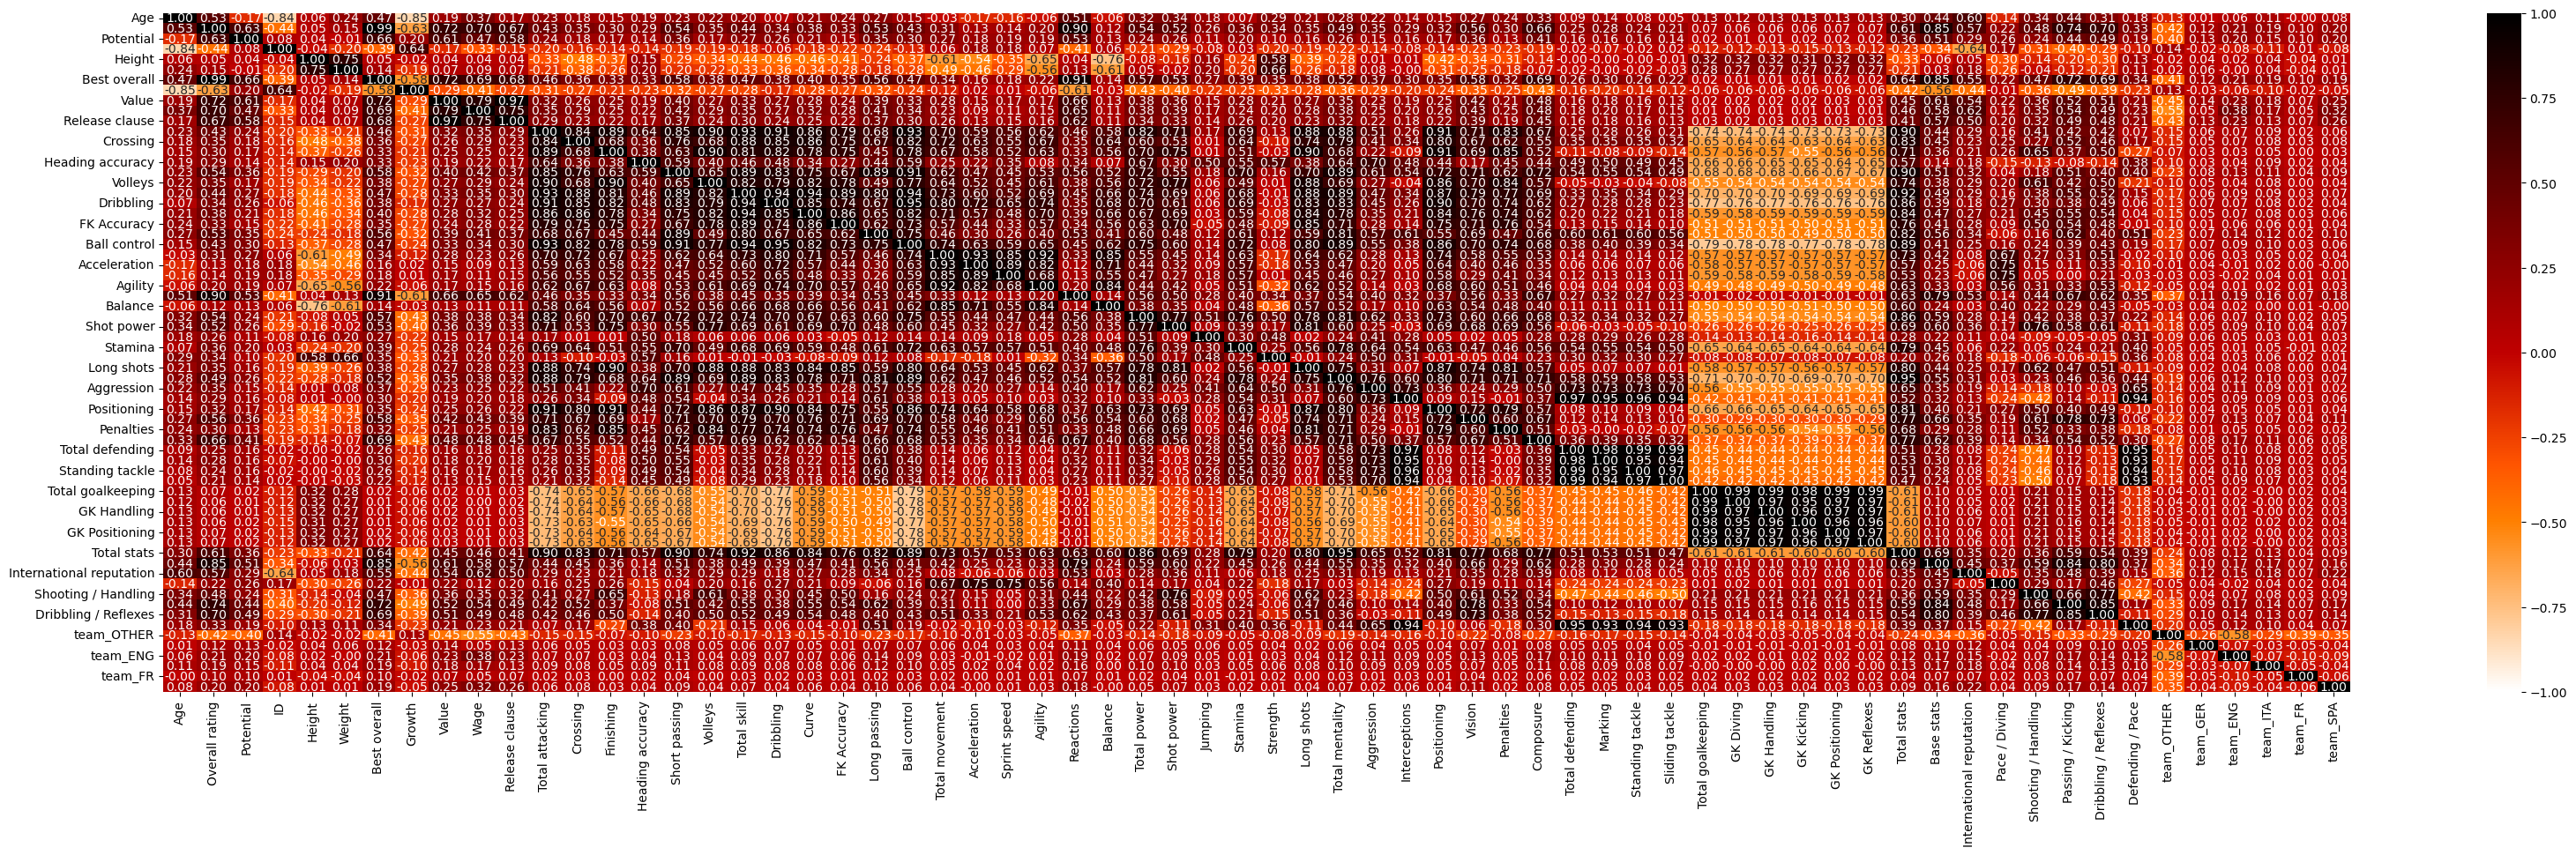

In [20]:
plt.figure(figsize=[40,10]) 
sns.heatmap(df.corr(), cmap="gist_heat_r", annot=True,vmin=-1, vmax=1, fmt='.2f'); #annot;sayıları gösterir.

In [21]:
correlation_matrix = df.corr().values
correlation_matrix

array([[ 1.00000000e+00,  5.32812804e-01, -1.73025283e-01, ...,
         1.11144442e-01, -7.57861869e-04,  7.63737692e-02],
       [ 5.32812804e-01,  1.00000000e+00,  6.30720958e-01, ...,
         1.92881019e-01,  9.71619287e-02,  1.99454625e-01],
       [-1.73025283e-01,  6.30720958e-01,  1.00000000e+00, ...,
         1.47162771e-01,  1.00563340e-01,  1.97516259e-01],
       ...,
       [ 1.11144442e-01,  1.92881019e-01,  1.47162771e-01, ...,
         1.00000000e+00, -4.95763065e-02, -4.46973224e-02],
       [-7.57861869e-04,  9.71619287e-02,  1.00563340e-01, ...,
        -4.95763065e-02,  1.00000000e+00, -6.01532165e-02],
       [ 7.63737692e-02,  1.99454625e-01,  1.97516259e-01, ...,
        -4.46973224e-02, -6.01532165e-02,  1.00000000e+00]])

In [22]:
high_correlations = np.where((correlation_matrix >= 0.8) & (correlation_matrix < 1.0))

high_correlation_values = correlation_matrix[high_correlations]

for i in range(len(high_correlation_values)):
    row, col = high_correlations[0][i], high_correlations[1][i]
    correlation = high_correlation_values[i]
    print(f"({row}, {col}): {correlation}")

(1, 6): 0.9880334111582626
(1, 27): 0.9039480968763819
(1, 53): 0.8517705140338417
(6, 1): 0.9880334111582626
(6, 27): 0.9064768621201652
(6, 53): 0.8467788006471625
(8, 10): 0.96545610607782
(10, 8): 0.96545610607782
(11, 12): 0.8406606444180086
(11, 13): 0.8882601895187658
(11, 15): 0.8525301656723455
(11, 16): 0.8965064326169014
(11, 17): 0.9280518575629542
(11, 18): 0.9132753590962037
(11, 19): 0.8614925524575194
(11, 22): 0.9278412269040115
(11, 29): 0.8216907180680941
(11, 34): 0.8832102427695
(11, 35): 0.880436236136507
(11, 38): 0.9132641688975593
(11, 40): 0.8323932123973354
(11, 52): 0.8975122800953208
(12, 11): 0.8406606444180086
(12, 17): 0.8804489039839163
(12, 18): 0.852839958715297
(12, 19): 0.8614730292694825
(12, 22): 0.8227922023583563
(12, 52): 0.8310685248175984
(13, 11): 0.8882601895187658
(13, 16): 0.8997313049001789
(13, 17): 0.8053210924393603
(13, 18): 0.8232865170968302
(13, 34): 0.9024781094811632
(13, 38): 0.9101503986020647
(13, 40): 0.8509578760154908
(15,

In [23]:
import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [24]:
df.shape

(2702, 57)

## getting dummies for foot and best position

In [25]:
df = pd.get_dummies(df, columns=['foot','Best position'],  drop_first=True)
df

,name,Age,Overall rating,Potential,ID,Height,Weight,Growth,Value,Wage,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total goalkeeping,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team_OTHER,team_GER,team_ENG,team_ITA,team_FR,team_SPA,foot_Right,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST
0,J. Todibo,22,79,84,245388,190,88,5,24500000,37000,286,49,44,80,78,35,301,66,52,41,70,72,335,68,81,55,76,55,335,60,76,73,81,45,305,72,80,45,56,52,78,52,409,1,75,47,63,67,80,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,B. Verbruggen,19,73,83,258498,194,89,10,5500000,6000,74,10,8,15,35,6,89,15,11,15,30,18,244,52,52,32,73,35,218,53,65,21,72,7,99,17,19,4,38,21,30,360,412,1,75,70,71,76,52,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,M. Ugarte,21,79,85,253306,182,77,6,26000000,11000,286,58,65,39,79,45,339,79,54,50,79,77,349,71,72,69,77,60,336,62,53,83,73,65,355,73,83,75,74,50,84,53,433,1,72,63,71,77,75,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,Z. Debast,18,70,84,254262,189,76,14,3500000,3000,296,69,51,68,71,37,331,69,58,59,74,71,310,61,71,56,69,53,327,60,66,74,71,56,295,75,67,53,58,42,67,38,395,1,67,53,67,67,69,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,07 D. Last,37,61,60,21555,182,82,-1,0,0,137,35,32,35,35,0,139,35,0,33,63,8,146,44,46,0,56,0,134,30,0,45,51,8,74,41,0,0,0,33,0,248,356,3,63,55,63,60,45,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2697,D. Mihailovic,23,76,81,237496,178,69,5,11500000,10000,346,73,71,59,79,64,361,75,73,64,72,77,370,76,69,74,76,75,349,75,54,91,62,67,331,59,62,75,80,55,75,52,422,1,72,70,76,76,60,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2698,G. Togni,24,70,71,237512,180,76,1,2000000,7000,319,69,65,63,67,55,312,71,59,55,57,70,373,78,77,76,70,72,336,73,59,69,71,64,329,68,61,69,67,64,70,49,411,1,77,66,65,71,63,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2699,M. Camara,25,75,77,237520,182,80,2,7000000,47000,348,69,71,67,75,66,347,72,69,55,75,76,378,74,77,78,74,75,391,84,70,80,82,75,366,84,76,76,76,54,77,49,452,1,76,74,73,74,74,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2700,S. Kaba,27,69,69,237524,191,80,0,1500000,14000,311,49,68,69,66,59,280,67,45,39,56,73,308,62,63,55,65,63,369,76,75,70,90,58,299,67,25,69,69,69,65,56,367,1,63,67,59,67,31,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 70 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   name                      2702 non-null   object
 1   Age                       2702 non-null   int64 
 2   Overall rating            2702 non-null   int64 
 3   Potential                 2702 non-null   int64 
 4   ID                        2702 non-null   int64 
 5   Height                    2702 non-null   int64 
 6   Weight                    2702 non-null   int64 
 7   Growth                    2702 non-null   int64 
 8   Value                     2702 non-null   int64 
 9   Wage                      2702 non-null   int64 
 10  Total attacking           2702 non-null   int64 
 11  Crossing                  2702 non-null   int64 
 12  Finishing                 2702 non-null   int64 
 13  Heading accuracy          2702 non-null   int64 
 14  Short passing           

## scaling to prevent unit differences between features

In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

sayisal_sutunlar = df.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()

df[sayisal_sutunlar] = scaler.fit_transform(df[sayisal_sutunlar])

print(df)

                   name       Age  Overall rating  Potential        ID  \
0            J. Todibo  -0.343307        1.003454   1.008922  0.270389   
1        B. Verbruggen  -1.022713        0.146206   0.828695  0.701595   
2           M. Ugarte   -0.569776        1.003454   1.189149  0.530823   
3            Z. Debast  -1.249182       -0.282418   1.008922  0.562267   
4           07 D. Last   3.053723       -1.568290  -3.316516 -7.091796   
...                 ...       ...             ...        ...       ...   
2697   D. Mihailovic    -0.116838        0.574830   0.468242  0.010810   
2698        G. Togni     0.109630       -0.282418  -1.334024  0.011336   
2699        M. Camara    0.336099        0.431955  -0.252664  0.011599   
2700           S. Kaba   0.789036       -0.425293  -1.694477  0.011731   
2701  20 T. Ephestion    0.109630       -1.139666  -1.334024  0.012619   

        Height    Weight    Growth     Value      Wage  Total attacking  \
0     1.231359  1.804498 -0.256868  

In [28]:
df.head()

,name,Age,Overall rating,Potential,ID,Height,Weight,Growth,Value,Wage,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total movement,Acceleration,Sprint speed,Agility,Reactions,Balance,Total power,Shot power,Jumping,Stamina,Strength,Long shots,Total mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Total goalkeeping,Base stats,International reputation,Pace / Diving,Shooting / Handling,Passing / Kicking,Dribbling / Reflexes,Defending / Pace,team_OTHER,team_GER,team_ENG,team_ITA,team_FR,team_SPA,foot_Right,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST
0,J. Todibo,-0.343307,1.003454,1.008922,0.270389,1.231359,1.804498,-0.256868,0.874948,0.255101,0.000674,-0.474278,-0.528634,1.377097,0.857557,-0.814956,0.016201,0.021814,-0.241618,-0.448663,0.652543,0.289167,-0.246077,-0.207772,0.757206,-1.009597,0.813474,-0.911215,0.301046,-0.368531,0.770972,0.359667,1.115468,-0.506813,0.290465,0.669197,1.325062,-0.720387,-0.480028,-0.095533,0.953352,-0.249950,0.506321,-0.470637,0.198320,-0.905640,-0.153585,-0.356181,1.464876,-1.496599,-0.175796,-0.385125,-0.191932,3.871455,-0.23288,0.594733,2.234084,-0.267949,-0.07718,-0.290292,-0.266359,-0.191932,-0.206006,-0.117829,-0.154508,-0.200077,-0.280433,-0.134484,-0.164274,-0.424768
1,B. Verbruggen,-1.022713,0.146206,0.828695,0.701595,1.810747,1.942157,0.644271,-0.303505,-0.553300,-3.014375,-2.720301,-2.345962,-2.506325,-2.558615,-2.381225,-2.865902,-2.957352,-2.489050,-1.923328,-2.299359,-3.347119,-1.990514,-1.394507,-1.417365,-2.630596,0.481014,-2.297183,-2.109015,-0.916604,-0.096291,-3.242485,0.403201,-2.483321,-3.049264,-2.715620,-1.468947,-2.836187,-1.825345,-2.064047,-2.837376,3.732904,0.582284,-0.470637,0.198320,0.706837,0.665535,0.641931,-0.099876,0.668182,-0.175796,-0.385125,-0.191932,-0.258301,-0.23288,0.594733,-0.447611,-0.267949,-0.07718,-0.290292,3.754327,-0.191932,-0.206006,-0.117829,-0.154508,-0.200077,-0.280433,-0.134484,-0.164274,-0.424768
2,M. Ugarte,-0.569776,1.003454,1.189149,0.530823,0.072584,0.290246,-0.076640,0.967983,-0.422913,0.000674,0.044035,0.531474,-1.072446,0.937002,-0.274864,0.532804,0.781209,-0.131987,0.061798,1.316721,0.625861,0.022298,0.014741,0.082339,-0.022902,0.924294,-0.564723,0.321645,-0.211939,-1.042396,1.052388,0.482342,0.533455,1.101079,0.730739,1.462472,0.827760,0.865289,-0.222534,1.427193,-0.237019,1.114020,-0.470637,-0.099712,0.216083,0.665535,0.752832,1.185456,0.668182,-0.175796,-0.385125,-0.191932,-0.258301,-0.23288,0.594733,-0.447611,3.732047,-0.07718,-0.290292,-0.266359,-0.191932,-0.206006,-0.117829,-0.154508,-0.200077,-0.280433,-0.134484,-0.164274,-0.424768
3,Z. Debast,-1.249182,-0.282418,1.008922,0.562267,1.086513,0.152587,1.365182,-0.427552,-0.631532,0.142893,0.677528,-0.175265,0.660157,0.301436,-0.706938,0.424046,0.197059,0.087275,0.572259,0.947733,0.221829,-0.725318,-0.726968,0.007354,-0.939118,0.037733,-1.049812,0.136256,-0.368531,-0.017449,0.428939,0.324061,0.065334,0.128342,0.853823,0.729617,-0.307548,-0.330548,-0.730537,0.084644,-0.430989,0.151831,-0.470637,-0.596432,-0.484994,0.255975,-0.356181,0.850152,0.668182,-0.175796,-0.385125,-0.191932,-0.258301,-0.23288,0.594733,-0.447611,3.732047,-0.07718,-0.290292,-0.266359,-0.191932,-0.206006,-0.117829,-0.154508,-0.200077,-0.280433,-0.134484,-0.164274,-0.424768
4,07 D. Last,3.053723,-1.568290,-3.316516,-7.091796,0.072584,0.978542,-1.338235,-0.644636,-0.709765,-2.118394,-1.280543,-1.134410,-1.311426,-2.558615,-2.705281,-2.186161,-1.789052,-3.092020,-0.902406,0.135960,-4.020505,-3.869138,-1.987874,-1.867276,-4.885899,-1.402929,-4.722627,-3.839315,-2.717417,-5.221026,-1.579954,-1.258753,-2.431307,-3.454571,-1.238609,-2.339213,-3.042607,-4.665460,-1.302042,-5.206581,2.284594,-0.835679,2.333466,-0.9938

## defining X and y

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
X= df.drop(columns=["ID","name","Value"])
y= df.loc[:,"Value"]

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2702 entries, 0 to 2701
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       2702 non-null   float64
 1   Overall rating            2702 non-null   float64
 2   Potential                 2702 non-null   float64
 3   Height                    2702 non-null   float64
 4   Weight                    2702 non-null   float64
 5   Growth                    2702 non-null   float64
 6   Wage                      2702 non-null   float64
 7   Total attacking           2702 non-null   float64
 8   Crossing                  2702 non-null   float64
 9   Finishing                 2702 non-null   float64
 10  Heading accuracy          2702 non-null   float64
 11  Short passing             2702 non-null   float64
 12  Volleys                   2702 non-null   float64
 13  Total skill               2702 non-null   float64
 14  Dribblin

In [32]:
y

0       0.874948
1      -0.303505
2       0.967983
3      -0.427552
4      -0.644636
          ...   
2697    0.068638
2698   -0.520588
2699   -0.210469
2700   -0.551600
2701   -0.605871
Name: Value, Length: 2702, dtype: float64

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape

(2161, 67)

In [35]:
X_test.shape

(541, 67)

In [36]:
y_train.shape

(2161,)

In [37]:
y_test.shape

(541,)

## model training with 2 methods

In [38]:
import statsmodels.api as sm

X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant)

fit = model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Value   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     112.1
Date:                Wed, 15 May 2024   Prob (F-statistic):               0.00
Time:                        13:48:52   Log-Likelihood:                -1445.2
No. Observations:                2161   AIC:                             3012.
Df Residuals:                    2100   BIC:                             3359.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.0049      0.010     -0.478      0.633      -0.025       0.015
Age                         -0.3922      0.026    -15.288      0.000      -0.443      -0.342
Overall rating               0.2573      0.023     11.247      0.000       0.212       0.302
Potential                    0.1300      0.016      7.894      0.000       0.098       0.162
Height                      -0.0131      0.022     -0.609      0.543      -0.055       0.029
Weight                      -0.0166      0.019     -0.874      0.382      -0.054       0.021
Growth                      -0.1946      0.021     -9.376      0.000      -0.235      -0.154
Wage                         0.5056      0.019     26.504      0.000       0.468       0.543
Total attacking             -0.0192      0.025     -0.762      0.446      -0.069       0.030
Crossing                     0.0147      0.039      0.378      0.706      -0.061       0.091
Finishing                   -0.0024      0.089     -0.026      0.979      -0.177       0.173
Heading accuracy            -0.0276      0.029     -0.954      0.340      -0.084       0.029
Short passing               -0.0624      0.047     -1.339      0.181      -0.154       0.029
Volleys                     -0.0168      0.031     -0.545      0.586      -0.077       0.044
Total skill                  0.0186      0.023      0.801      0.423      -0.027       0.064
Dribbling                    0.0712      0.086      0.832      0.406      -0.097       0.239
Curve                       -0.0250      0.032     -0.786      0.432      -0.087       0.037
FK Accuracy                 -0.0085      0.027     -0.318      0.750      -0.061       0.044
Long passing                 0.0703      0.033      2.163      0.031       0.007       0.134
Ball control                -0.0131      0.059     -0.222      0.824      -0.128       0.102
Total movement               0.0259      0.017      1.550      0.121      -0.007       0.059
Acceleration                 0.0480      0.046      1.052      0.293      -0.041       0.137
Sprint speed                 0.0254      0.051      0.498      0.619      -0.075       0.125
Agility                     -0.0281      0.030     -0.942      0.346      -0.087       0.030
Reactions                    0.0633      0.027      2.367      0.018       0.011       0.116
Balance                      0.0135      0.025      0.539      0.590      -0.036       0.063
Total power                 -0.0028      0.022     -0.129      0.897      -0.046       0.040
Shot power                  -0.0836      0.034     -2.430      0.015      -0.151      -0.016
Jumping                     -0.0194      0.015     -1.303      0.193      -0.049       0.010
Stamina                      0.0375      0.030      1.257      0.209      -0.021       0.096
Strength      

In [39]:
lreg = LinearRegression()

lreg.fit(X_train,y_train)

pred = lreg.predict(X_train)


print("Train Score: ", lreg.score(X_train, y_train))

Train Score:  0.7245042292856301
